In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pylab as plt
import numpy as np
from fluka_muon_data import fluka_data, fluka_en_dist

In [10]:
data_dist = fluka_data()

In [11]:
for i in data_dist:
    print(i)

E1-143
E2-143
E3-143
E1-647
E2-647
E3-647
E1-1033
E2-1033
E3-1033


E1-143 1.432465933051087 1.0 1.3
E2-143 1.4407966814216255 2.0 2.5
E3-143 1.1353986284172515 4.0 5.0
E1-647 1.3899554944972428 1.0 1.3
E2-647 1.3881944936959705 2.0 2.5
E3-647 1.1257812634765167 4.0 5.0
E1-1033 0.9335615493441491 1.0 1.3
E2-1033 0.997360884461483 2.0 2.5
E3-1033 0.8648855839512222 4.0 5.0


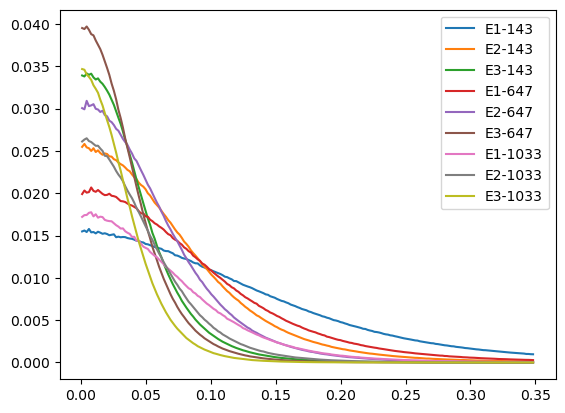

In [21]:
en_dist = dict()
for i in data_dist:
    ang_dist = data_dist[i]
    num_dist = ang_dist[3]*(ang_dist[2]-ang_dist[1])*(ang_dist[5][1] - ang_dist[5][0])
    print(i, np.sum(num_dist), ang_dist[5][0],ang_dist[5][1])
    plt.plot((ang_dist[1] + ang_dist[2])/2, num_dist, label = i)
    xdepth = i.split("-")[1]
    # en_dist.setdefault( i, [] ).append( j )
    en_dist.setdefault(xdepth, []).append([np.sum(num_dist), ang_dist[5][0], ang_dist[5][1]])
    
plt.legend()    

In [25]:
num_en_dist = dict()
for key, value in en_dist.items():
    num = np.array([value[0][0], 0, value[1][0], 0, value[2][0]])
    en = np.array([value[0][1], value[0][2], value[1][1], value[1][2], value[2][1], value[2][2]])
    num_en_dist[key] = (en, num)


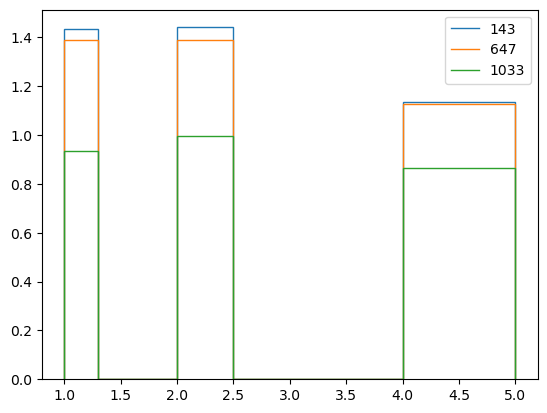

In [31]:
for name, value in num_en_dist.items():
    # plt.steps(value[0], value[1])
    plt.stairs(value[1], value[0], label = name)
    
plt.legend()    

(array([1. , 1.3, 2. , 2.5, 4. , 5. ]), array([1.43246593, 0.        , 1.44079668, 0.        , 1.13539863]))
(array([1. , 1.3, 2. , 2.5, 4. , 5. ]), array([1.38995549, 0.        , 1.38819449, 0.        , 1.12578126]))
(array([1. , 1.3, 2. , 2.5, 4. , 5. ]), array([0.93356155, 0.        , 0.99736088, 0.        , 0.86488558]))


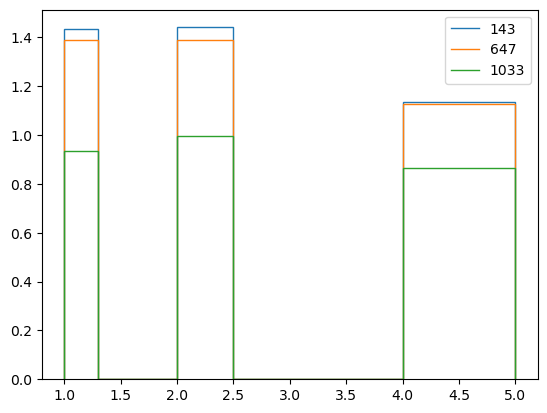

In [3]:
for name, value in fluka_en_dist().items():
    # plt.steps(value[0], value[1])
    plt.stairs(value[1], value[0], label = name)
    print(value)
    
plt.legend()    